In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json, gzip
from tqdm import tqdm
from collections import Counter

In [2]:
def open_dataframe(df_dir: str, printable: bool = False) -> pd.DataFrame:
    metadata_df = pd.read_json(df_dir, lines=True)
    if printable is True:
        print(metadata_df.head())
    return metadata_df


def dump_dataframe(df_dir: str, df_data: pd.DataFrame) -> None:
    json_str = df_data.to_json(orient="records", lines=True)
    with gzip.open(df_dir, "wt", encoding="utf-8") as f:
        f.write(json_str)
    print(f"successfully dumped into file {df_dir}")

In [3]:
file_dir = '/home/zxia15/data_zxia15/russian-semantics/work/filtered11_metadata_russian_documents.jsonl.gz'

df = open_dataframe(file_dir)
print(len(df))
df.head()

15417


,htid,russian text ratio,year,form,content_length,normalized_author,normalized_title
0,mdp.39015009128698,98.944547,1941,None,241396,"Merezhkovsky, Dmitry Sergeyevich","Gogolʹ tvorchestvo, zhiznʹ i religiia"
1,mdp.39015006976008,99.458652,1928,nonfiction,100497,"Aikhenvalʹd, IU. I.",Poety i poetessy
2,mdp.39015039267706,99.433717,1937,nonfiction,82703,"Zamiatin, Evgenii Ivanovich",Robert Maier
3,uc1.$b624626,97.934253,1934,nonfiction,370214,"Bely, Andrey",Ofeira putevye zametki
4,njp.32101017212554,99.056794,1920,nonfiction,417670,"Shchepkin, V. N.",Uchebnik russkoi paleografii


In [4]:
df[df['year'] <= 1500]

,htid,russian text ratio,year,form,content_length,normalized_author,normalized_title
1141,mdp.39015026722911,99.240431,1400,None,69769,Agrefenii,Khozhdenie arkhimandrit Agrefen'ia obieteli Pr...
1671,mdp.39015026494396,94.408069,1271,nonfiction,1443320,Vardan,Sborniki pritch Vardana
5705,njp.32101075722528,95.516209,1122,nonfiction,382317,Daniil,Puteshestvie igumena Daniila po Sviatoi Zemlie...
7818,uc1.c2810382,98.534105,1420,nonfiction,364051,"TSamblak, Grigorii",Iz istorii slavianskoi propoviedi v Moldavii
8959,uc1.c3435631,96.108246,1189,nonfiction,43044,Kulin,Gramota bana Kulina
12145,chi.76647591,98.714888,1122,nonfiction,538852,Daniil,"Zhitʹe i khozhenʹe Danila, Rusʹskyia zemli igu..."
12715,chi.090256023,98.984164,1496,nonfiction,244967,Savva,Poslanie Inoka Savvy na zhidov i na eretiki 14...


In [5]:
df[(df['year'] <= 1600) & (df['year'] > 1500)]

,htid,russian text ratio,year,form,content_length,normalized_author,normalized_title
505,mdp.39015014562246,97.170412,1583,nonfiction,320400,"Kurbskii, Andrei Mikhailovich",Sochineniia
1300,mdp.39015074215578,98.860447,1583,None,157805,"Kurbskii, Andrei Mikhailovich",Pisʹma kniazia A M Kurbskago k raznym litsam
3859,nnc1.0043094031,99.475651,1556,nonfiction,1458511,Maximus,Sochineni i a prepodobnago Maksima Greka v rus...
4231,nnc1.cu60600268,96.361333,1554,nonfiction,107996,"Savva, Bp. pf Krutitsk",Zhitie prepodobnago Iosifa Volokolamskago
4596,hvd.hw6eiu,98.541246,1583,nonfiction,1033743,"Kurbskii, Andrei Mikhailovich",Skazaniia kniazia Kurbskago
8660,uc1.$c56665,97.996700,1566,nonfiction,504879,Silʹvestr,"Domostroi,"
8681,uc1.$c134361,98.150131,1584,nonfiction,63245,"Arsenii, Vysokii",Ukazets knigokhranitelia Spaso-Prilutskago mon...
8797,uc1.c3343374,92.808354,1584,nonfiction,23642,Ivan,Stikhiry polozhennyia na kriukovyia noty
8958,uc1.c3435610,98.060410,1561,nonfiction,26037,Isaiia,K literaturnoi dieiatelʹnosti mnikha Kamiachan...
9731,hvd.32044081801243,95.415705,1584,None,87209,Ivan,Otviet tsaria Ioanna Vasilʹevicha Groznago IAn...


In [6]:
df[(df['year'] <= 1700) & (df['year'] > 1600)]['normalized_author'].unique()

array(['Avvakum Petrovich', 'Zheliabuzhskii, Ivan Afanasʹev',
       'Innokentii Gizel', 'Aleksei Mikhailovich', 'Nikon',
       'Griboedov, Fedor Akimovich', 'Markovich, I   A   kov Andreevich',
       'Shusherin, Ivan Kornilʹevich', 'Ioakim', 'Simon Azarʹin',
       'Filaret', 'Timofeev, Ivan', 'Kotoshikhin, Grigorii',
       'Kotoshikhin, Grigorii Karpovich', 'Medviedev, Silʹvestr',
       'Kotov, Fedot Afanasʹevich', 'Avraamii', 'Germogen'], dtype=object)

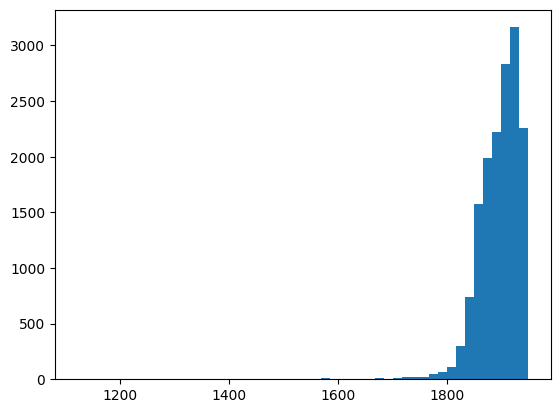

In [7]:
plt.hist(df['year'], bins=50)
plt.show()

('Tolstoy, Leo', 'Nemirovich-Danchenko, Vasilii   Ivanovich', 'Gorky, Maksim', 'Kareev, Nikolai Ivanovich', 'Amfiteatrov, Aleksandr', 'Pushkin, Aleksandr Sergeevich', 'Merezhkovsky, Dmitry Sergeyevich', 'Turgenev, Ivan Sergeevich', 'Lenin, Vladimir Ilʹich', 'Chekhov, Anton Pavlovich', 'Pogodin, Mikhail Petrovich', 'Likhachev, Nikolai Petrovich', 'Andreyev, Leonid', 'Chirikov, E. N.', 'Kropotkin, Petr Alekseevich', 'Plekhanov, Georgii Valentinovich', 'Gogolð, Nikolaæi Vasilðevich', 'Shmelev, I. S.', 'Grot, IA. K.', 'Balʹmont, Konstantin Dmitrievich')


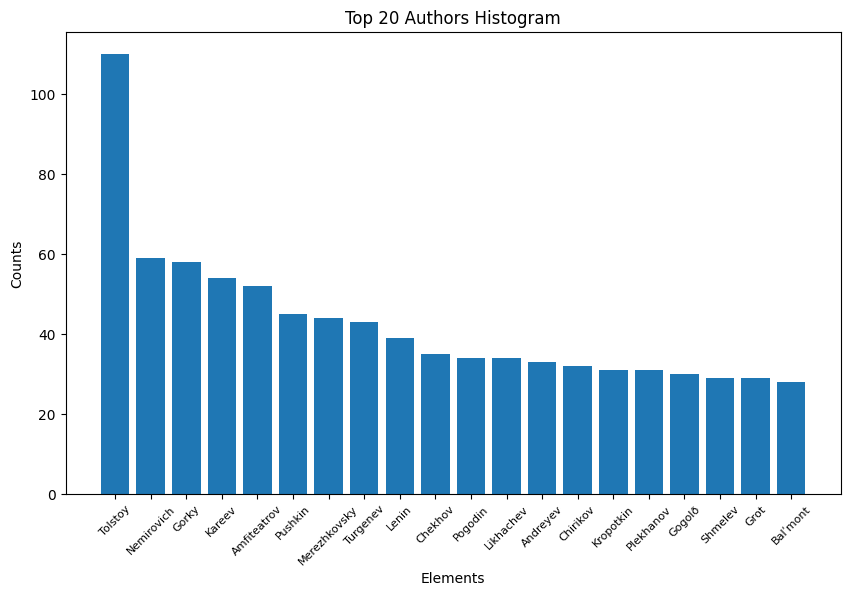

In [11]:
counter = Counter(df['normalized_author'].tolist())

# Get the top k elements (e.g., top 2)
k = 20
top_k = counter.most_common(k)

# Separate the elements and their counts
elements, counts = zip(*top_k)
print(elements)
elements = [element.split(', ')[0] for element in elements]
elements = [element.split('-')[0] for element in elements]

plt.figure(figsize=(10, 6))

# Plot the histogram
plt.bar(elements, counts)
plt.xlabel('Elements')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Counts')
plt.title(f'Top {k} Authors Histogram')
plt.show()

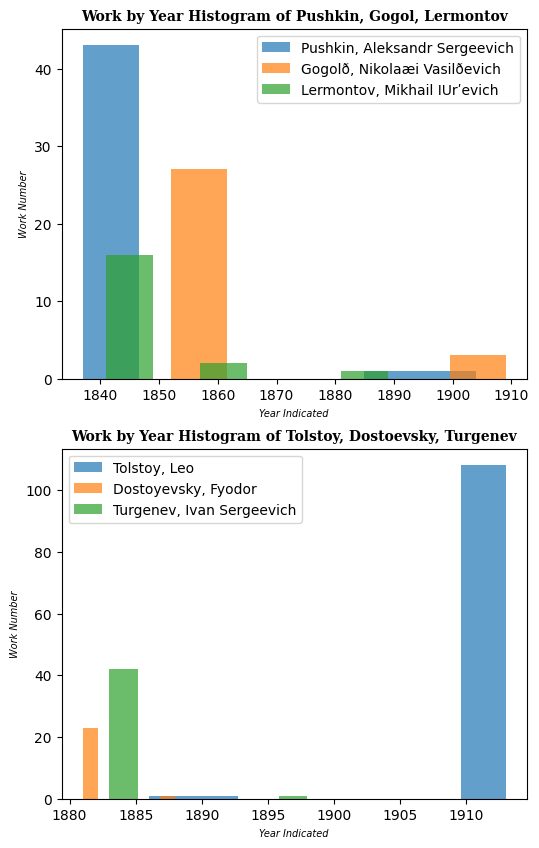

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10))

axs[0].hist(df[df['normalized_author'] == 'Pushkin, Aleksandr Sergeevich']['year'], alpha=0.7, bins='auto', label='Pushkin, Aleksandr Sergeevich')
axs[0].hist(df[df['normalized_author'] == 'Gogolð, Nikolaæi Vasilðevich']['year'], alpha=0.7, bins='auto', label='Gogolð, Nikolaæi Vasilðevich')
axs[0].hist(df[df['normalized_author'] == 'Lermontov, Mikhail IUr\u02b9evich']['year'], alpha=0.7, bins='auto', label='Lermontov, Mikhail IUr\u02b9evich')
axs[0].set_xlabel('Year Indicated', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[0].set_ylabel('Work Number', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[0].set_title('Work by Year Histogram of Pushkin, Gogol, Lermontov', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
axs[0].legend()

axs[1].hist(df[df['normalized_author'] == 'Tolstoy, Leo']['year'], alpha=0.7, bins='auto', label='Tolstoy, Leo')
axs[1].hist(df[df['normalized_author'] == 'Dostoyevsky, Fyodor']['year'], alpha=0.7, bins='auto', label='Dostoyevsky, Fyodor')
axs[1].hist(df[df['normalized_author'] == 'Turgenev, Ivan Sergeevich']['year'], bins='auto', alpha=0.7, label='Turgenev, Ivan Sergeevich')
axs[1].set_xlabel('Year Indicated', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[1].set_ylabel('Work Number', fontdict={'fontsize': 7, 'fontstyle': 'italic', 'family': 'sans-serif'})
axs[1].set_title('Work by Year Histogram of Tolstoy, Dostoevsky, Turgenev', fontdict={'fontsize': 10, 'fontweight': 'bold', 'family': 'serif'})
axs[1].legend()

plt.show()